In [1]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
from pathlib import Path
import re
import sys
import yaml
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from func.utils import get_categorical_features, read_pkl_gzip, to_pkl_gzip, parallel_load_data, get_filename, logger_func
from ieee_train import eval_train, eval_check_feature
from kaggle_utils import reduce_mem_usage, move_feature
logger = logger_func()

2019-09-17 22:55:29,121 func.utils 347 [INFO]    [logger_func] start 


In [2]:
COLUMN_ID = 'TransactionID'
COLUMN_DT = 'TransactionDT'
COLUMN_TARGET = 'isFraud'
COLUMN_GROUP = 'DT-M'
COLUMNS_IGNORE = [COLUMN_ID, COLUMN_DT, COLUMN_TARGET, COLUMN_GROUP, 'is_train', 'date']

def filter_feature(path):
    if path.count(''):
        return True
    else:
        return False

# paths_train = glob('../submit/lb9516/*_train.gz')
# paths_test  = glob('../submit/lb9516/*_test.gz')
# paths_train += glob('../feature/raw_use/is*_train.gz')
# paths_test  += glob('../feature/raw_use/is*_test.gz')
# paths_train += glob('../feature/raw_use/TransactionID_train.gz')
# paths_test  += glob('../feature/raw_use/TransactionID_test.gz')
paths_train = glob('../submit/sub_valid/*_train.gz')
paths_test  = glob('../submit/sub_valid/*_test.gz')
paths_train += glob('../feature/valid_use/*_train.gz')
paths_test  += glob('../feature/valid_use/*_test.gz')
    
# paths_train = glob('../feature/raw_use/*_train.gz')
# paths_test = glob('../feature/raw_use/*_test.gz')
# paths_train = [path for path in paths_train if filter_feature(path) ]
# paths_test = [path for path in paths_test if filter_feature(path) ]

# paths_train_feature = sorted(glob('../feature/org_use/*_train.gz'))
# paths_test_feature  = sorted(glob('../feature/org_use/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/valid/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/valid/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/kernel/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/kernel/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/valid_use/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/valid_use/*_test.gz'))

# df_train = reduce_mem_usage( parallel_load_data(paths_train) )
# df_test  = reduce_mem_usage( parallel_load_data(paths_test) )
df_train = parallel_load_data(paths_train)
df_test  = parallel_load_data(paths_test)
Y = df_train[COLUMN_TARGET]
df_train.drop(COLUMN_TARGET, axis=1, inplace=True)

  * Diff Features: 0


2019-09-17 22:56:28,751 func.utils 109 [INFO]    [<module>] * EXP: dataset new_set isDec False lr 0.05  


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.944012
Early stopping, best iteration is:
[228]	valid_0's auc: 0.944521


2019-09-17 22:58:30,020 func.utils 140 [INFO]    [ieee_cv]   * Fold0 2018-3: 0.9445206231906376 | Bear's...PB:0.950811904046516 PV:0.9642790733574479 All:0.9600822117909332 


[  * Fold0 Validation-DT-M 2018-3: 101968] done in 112 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.932737
[400]	valid_0's auc: 0.933027
Early stopping, best iteration is:
[322]	valid_0's auc: 0.933608


2019-09-17 23:00:06,146 func.utils 140 [INFO]    [ieee_cv]   * Fold1 2018-1: 0.9336075884042098 | Bear's...PB:0.9663825527028038 PV:0.9624437337955085 All:0.9640566535683123 


[  * Fold1 Validation-DT-M 2018-1: 92510] done in 94 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.941231
Early stopping, best iteration is:
[298]	valid_0's auc: 0.942736
[  * Fold2 Validation-DT-M 2018-5: 92427] done in 88 s


2019-09-17 23:01:36,637 func.utils 140 [INFO]    [ieee_cv]   * Fold2 2018-5: 0.942735600005166 | Bear's...PB:0.938934697333715 PV:0.9302084173891079 All:0.9340858683310227 


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.952744
Early stopping, best iteration is:
[187]	valid_0's auc: 0.952958


2019-09-17 23:02:53,456 func.utils 140 [INFO]    [ieee_cv]   * Fold3 2018-2: 0.9529580947868821 | Bear's...PB:0.954643107811689 PV:0.9438636068610562 All:0.9481456405551341 


[  * Fold3 Validation-DT-M 2018-2: 85725] done in 74 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.958905
[400]	valid_0's auc: 0.961144
Early stopping, best iteration is:
[389]	valid_0's auc: 0.961271


2019-09-17 23:04:55,732 func.utils 140 [INFO]    [ieee_cv]   * Fold4 2018-4: 0.961270740434292 | Bear's...PB:0.9496611177946709 PV:0.9459322560160546 All:0.9476558774589595 


[  * Fold4 Validation-DT-M 2018-4: 83571] done in 120 s
[  * Make Prediction Result File.] done in 42 s
* Check Corr with Past Submit.
  *  (506691,) (506691,)
  * LB0.9516 / 0.9256300705552286
  *  (506691,) (506691,)
  * LB0.95169 / 0.9885949835516333
  *  (506691,) (506691,)
  * LB0.9518 / 0.9655583196375713
  *  (506691,) (506691,)
  * LB0.9529 / 0.957278903948476
  *  (506691,) (506691,)
  * LB0.9542 / 0.9074255299932433
* CV: 0.9470185293642374 | BestIter: 284.8
* Training Feature Importance


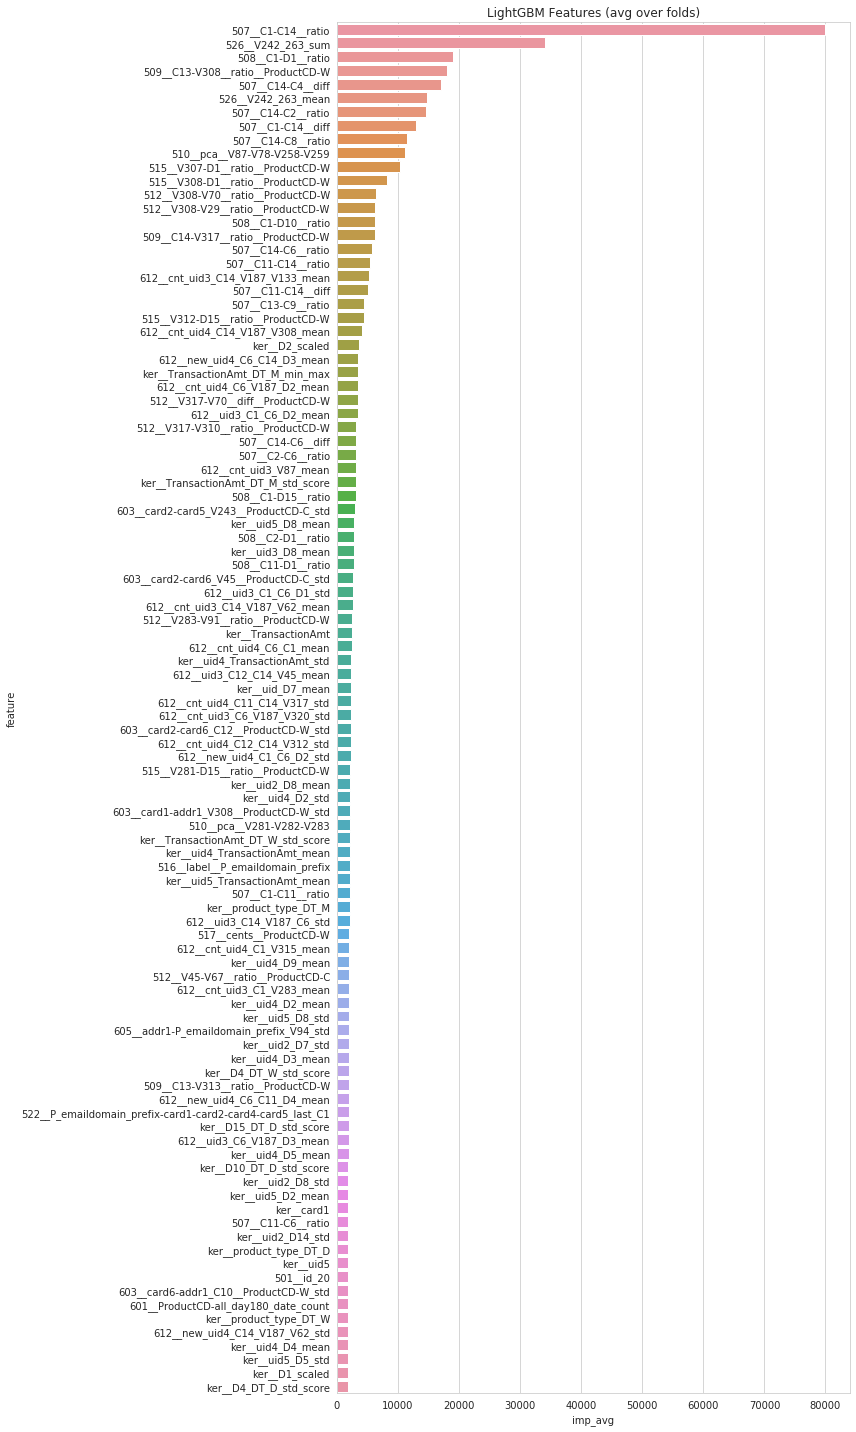

Setup Dataset dim_ml_dataset.


In [3]:
is_submit = [True, False][0]
is_dec = [True, False][1]
n_splits = 6
set_type = 'new_set'

# valid_paths_train = paths_train_feature[:]
# valid_paths_test  = paths_test_feature[:]

# #========================================================================
# # pathの存在チェック。なぜかたびたびFileNotFoundErrorが起きるので,,,
# #========================================================================
# remove_paths = []
# for trn_path, tes_path in zip(valid_paths_train, valid_paths_test):
#     if os.path.exists(trn_path) and os.path.exists(tes_path):
#         pass
#     else:
#         remove_paths.append(trn_path)
#         remove_paths.append(tes_path)
# for path in remove_paths:
#     if path.count('train'):
#         valid_paths_train.remove(path)
#         print(f'remove {path}')
#     elif path.count('test'):
#         valid_paths_test.remove(path)
#         print(f'remove {path}')

# df_feat_train = parallel_load_data(valid_paths_train)
# df_feat_test  = parallel_load_data(valid_paths_test)

# col_drops = eval_check_feature(df_feat_train, df_feat_test)

# tmp_train = df_train.join(df_feat_train)
# tmp_test = df_test.join(df_feat_test)

tmp_train = df_train
tmp_test = df_test

#========================================================================
# Train Test で片方に存在しないFeatureを除外
#========================================================================
diff_cols = list(set(tmp_train.columns) - set(tmp_test.columns))

for col in list(set(diff_cols)):
    from_dir = 'valid'
    to_dir = 'valid_trush'
    move_feature([col], from_dir, to_dir)
tmp_train.drop(diff_cols, axis=1, inplace=True)
print(f"  * Diff Features: {len(diff_cols)}")

# same_user_path = '../output/same_user_pattern/20190901_user_ids_share.csv'
# same_user_path = '../output/same_user_pattern/0902__same_user_id__card_addr_pemail_M.csv'
group_kfold_path = '../input/0908_ieee__DT-M_GroupKFold.gz'
group = read_pkl_gzip(group_kfold_path)
tmp_train[COLUMN_GROUP] = group

# 2017-12抜いてみる

if not is_dec:
    tmp_train = tmp_train[tmp_train[COLUMN_GROUP]!='2017-12']
    Y = Y.loc[tmp_train.index]
    n_splits = 5


#========================================================================
# Features elimination 
#==============================================================
# from scipy.stats import ks_2samp
# features_check = []
# columns_to_check = set(list(tmp_train)).difference(COLUMNS_IGNORE)
# for i in columns_to_check:
#     features_check.append(ks_2samp(tmp_test[i], tmp_train[i])[1])

# features_check = pd.Series(features_check, index=columns_to_check).sort_values() 
# features_discard = list(features_check[features_check==0].index)
# print(features_discard)
# tmp_train.drop(features_discard, axis=1, inplace=True)
# tmp_test.drop(features_discard, axis=1, inplace=True)


model_type = "lgb"
params = {
#     'n_jobs': 64,
    'n_jobs': 96,
#     'n_jobs': 32,
    'objective': 'binary',
    'num_leaves': 2**8-1,
    'max_depth': -1,
    'subsample': 0.9,
    'subsample_freq': 1,
    'colsample_bytree' : 0.30,
    'lambda_l1' : 0.1,
    'lambda_l2' : 1.0,
    'learning_rate' : 0.1,
    "early_stopping_rounds": 50,
    "seed": 1208,
    "bagging_seed": 1208,
    "feature_fraction_seed": 1208,
    "drop_seed": 1208,
    'n_splits': n_splits,
    'metric': 'auc',
    'model_type': model_type,
    'fold': ['stratified', 'group'][1],
}
if is_submit:
    params['learning_rate'] = 0.01
    params['learning_rate'] = 0.05
    params["early_stopping_rounds"] = 100

logger.info(f"* EXP: dataset {set_type} isDec {is_dec} lr {params['learning_rate']} ")

list_result_feim = eval_train(
    logger,
    tmp_train,
    Y,
    tmp_test,
    COLUMN_GROUP,
    model_type,
    params,
    is_adv=[True, False][1],
    is_viz=[True, False][0],
)

In [58]:
feim = list_result_feim[0]
list_uid = [f for f in feim.index if f.count('609') or f.count('612')]
feim.loc[list_uid]

,imp_fold1,imp_fold2,imp_fold3,imp_fold4,imp_fold5,imp_fold6,imp_avg
feature,,,,,,,
612__cnt_uid4_C14_V187_V308_mean,24776.962891,21998.968750,24200.273438,24238.720703,25945.488281,23068.224609,24038.103516
612__cnt_uid4_C11_C14_V317_std,23485.744141,25505.773438,21593.470703,22614.562500,25374.367188,24456.994141,23838.484375
612__new_uid4_C6_C14_D3_mean,23106.222656,18321.849609,22411.628906,18970.978516,21119.464844,23499.455078,21238.265625
612__new_uid4_C1_C6_D2_std,23269.871094,21510.941406,19288.523438,19985.644531,22095.052734,20937.701172,21181.291016
612__cnt_uid4_C6_V187_D2_mean,20023.482422,20347.654297,19938.746094,19222.396484,21205.472656,21099.066406,20306.134766
612__uid3_C1_C6_D2_mean,16328.147461,16637.173828,17199.611328,17525.537109,17220.091797,18208.578125,17186.523438
612__uid3_C12_C14_V45_mean,14302.708008,18544.134766,11376.673828,14606.520508,16682.689453,11064.526367,14429.541992
612__new_uid4_C14_V187_V62_std,14165.773438,14278.936523,11469.043945,14808.466797,12393.964844,13412.394531,13421.429688
612__cnt_uid3_C1_V283_mean,13413.474609,12602.803711,13157.692383,13562.750977,13024.838867,13361.321289,13187.145508


In [9]:
sub = pd.read_csv('../submit/lb/20190909_2324__CV0-9467296784440689__feature552.csv')
sub = pd.read_csv('../submit/tmp/20190917_0022__CV0-947676__BearAUC0-9631.csv')
sub = pd.read_csv('../submit/tmp/20190917_0825__CV0-9486992730843505__feature750.csv')
sub = pd.read_csv('../submit/tmp/20190917_0947__CV0-9454660522014052__feature750.csv')
sub = pd.read_csv('../submit/tmp/20190917_1107__CV0-9485055333319241__feature686.csv')
sub[COLUMN_ID] = sub[COLUMN_ID].astype('int')
sub.head()

,TransactionID,isFraud
0,3663549,0.000442
1,3663550,0.000682
2,3663551,0.000760
3,3663552,0.000929
4,3663553,0.000346


In [10]:
from sklearn.metrics import roc_auc_score
bear = pd.read_csv('../input/20190913_ieee__bear_probing.csv').iloc[:, [0, 3, 4, 6]]
bear = bear[bear[COLUMN_TARGET]==-1]
bear = bear.iloc[:, [0,1,3]]
sub.columns = [COLUMN_ID, 'pred']
bear.columns = [COLUMN_ID, 'data_type', COLUMN_TARGET]
bear_score = sub.merge(bear, how='inner', on=COLUMN_ID)
public = bear_score[bear_score['data_type']=='test_public']
private = bear_score[bear_score['data_type']=='test_private']


public_score = roc_auc_score(public[COLUMN_TARGET].values, public['pred'].values)
private_score = roc_auc_score(private[COLUMN_TARGET].values, private['pred'].values)
all_score = roc_auc_score(bear_score[COLUMN_TARGET].values, bear_score['pred'].values)
print(public_score, private_score, all_score)

0.9706412931559689 0.9623599703889779 0.9656998163011133


In [4]:
# feim = read_pkl_gzip('../output/feature_importances/20190912_0822__CV0-9456328818476605__feature726.gz')
# pd.set_option('max_rows', 200)
feim = list_result_feim[0]
# idx = [idx for idx in feim.index if idx.count('522_')]
# feim = feim.loc[idx]
feim.tail(100)
# feim.loc[[i for i in feim.index if i.count('browser')]]

,imp_fold1,imp_fold2,imp_fold3,imp_fold4,imp_fold5,imp_fold6,imp_avg
feature,,,,,,,
ker__C2_fq_enc,3747.883789,3851.317871,3856.016602,4166.633301,3901.173828,4360.776367,3980.633545
ker__card3_DT_D_hour_dist,2908.856934,4235.589844,4008.468506,4368.670410,3038.400146,5196.314941,3959.383545
517__cents__ProductCD-W,3999.681641,2930.601074,3731.733887,4637.179688,3390.208496,4411.786621,3850.198486
ker__C6_fq_enc,3487.891357,3498.899902,4113.752441,4010.236816,3104.831299,3967.906982,3697.252930
ker__C10_fq_enc,938.610107,1035.711670,6055.099121,6295.813965,3111.739502,3966.025146,3567.166748
603__card2-card5_C5__ProductCD-W_std,2691.301270,3494.937256,3378.628418,3597.624023,3549.942871,3815.729248,3421.360352
501__label__device_country__id_38,3423.976318,3929.998047,2200.971191,2497.901611,4054.841797,4245.608398,3392.216064
ker__uid3,3414.668945,2767.637451,3981.096680,3524.326416,3379.379883,3228.056885,3382.527588
606__card4-card5-card6-P_emaildomain_prefix_C1__ProductCD-C_std,3014.016357,2972.773193,4181.178223,3841.547119,2517.314453,3652.414795,3363.207031


In [9]:
# feim = read_pkl_gzip('../output/feature_importances/20190909_2324__CV0-9467296784440689__feature552.gz')
for feature_name in feim[feim['imp_avg']<50].index:
# for feature_name in feim.index:
#     if not feature_name.count('ker'):
#         continue

    if feature_name.count('raw'):
        from_dir = 'raw_use'
        to_dir = 'raw_trush'
#         from_dir = 'raw_trush'
#         to_dir = 'raw_use'
    else:
        from_dir = 'org_use'
        to_dir = 'org_trush'
#         from_dir = 'org_trush'
#         to_dir = 'org_use'
    from_dir = 'product_feature'
#     from_dir = 'kernel'
#     from_dir = 'check_trush'
#     from_dir = 'raw_trush'
#     from_dir = 'org_trush'
#     from_dir = 'useless'
    from_dir = 'valid_use'
    from_dir = 'org_use'
#     to_dir = 'valid_trush'
#     to_dir = 'check_trush'
#     to_dir = 'org_use'
    to_dir = 'useless'
#     to_dir = 'valid'
#     to_dir = 'kernel'
    try:
        print(feature_name)
        move_feature([feature_name], from_dir, to_dir)
    except FileNotFoundError:
        print(feature_name)

raw__R_emaildomain_mail_com_dummie
516__P_emaildomain_suffix_mx_dummie
516__R_emaildomain_suffix_es_dummie
516__R_emaildomain_suffix_us_dummie
516__P_emaildomain_suffix_es_dummie
516__R_emaildomain_suffix_fr_dummie
516__P_emaildomain_suffix_de_dummie
516__R_emaildomain_suffix_jp_dummie
516__P_emaildomain_suffix_fr_dummie
516__P_emaildomain_suffix_jp_dummie
516__R_emaildomain_suffix_uk_dummie
516__R_emaildomain_suffix_de_dummie
516__P_emaildomain_suffix_uk_dummie
